Sebelum lanjut, untuk pengguna google colab harap lakukan save a copy in drive dulu ya. Di latihan ini kita akan bahas contoh kasus :     

1. Uji beda 2 kelompok berhubungan
2. Uji beda 2 kelompok independent
3. Uji beda lebih dari 2 kelompok

keduanya akan dilakukan secara parametrik dan nonparametrik




In [2]:
#Import all library needed

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

# Uji beda 2 kelompok berhubungan

Diketahui nilai mahasiswa saat belajar offline dan online sebagai berikut (dalam skala 10)

offline = [10, 9, 7, 8, 7, 8, 9, 9, 8, 7, 7, 7, 8, 8, 9, 8, 8, 8, 8, 8, 9]

online = [8, 8, 7, 7, 6, 7, 7, 7, 7, 6, 6, 6, 6, 7, 8, 7, 8, 7, 8, 7, 8]

In [3]:
#Data
offline = np.array([10, 9, 7, 8, 7, 8, 9, 9, 8, 7, 7, 7, 8, 8, 9, 8, 8, 8, 8, 8, 9])
online = np.array([8, 8, 7, 7, 6, 7, 7, 7, 7, 6, 6, 6, 6, 7, 8, 7, 8, 7, 8, 7, 8])

## Uji Normalitas
Ho = data berdistribusi normal

Ha = data tidak berdistribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


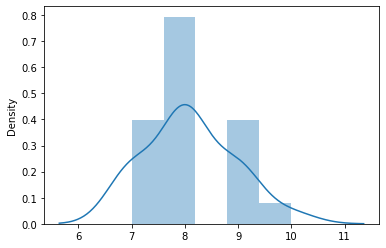

In [4]:
#Dengan histogram
sns.distplot(offline)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


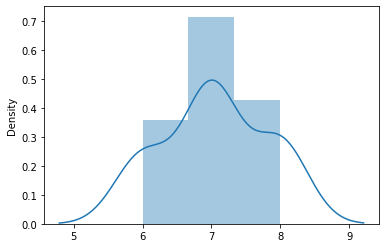

In [5]:
#Dengan histogram
sns.distplot(online)

Berdasarkan histogram, data berbentuk seperti lonceng dengan rata-rata pas di tengah, sehingga bisa kita simpulkan data berdistribusi normal berdasarkan histogram, mari coba dengan uji kolmogorov smirnov

In [23]:
#Uji Kolmogorov-Smirnov
z_score_offline = stats.zscore(offline)
z_score_online = stats.zscore(online)
hasil_uji_offline = stats.kstest(z_score_offline, "norm").pvalue
hasil_uji_online = stats.kstest(z_score_online, "norm").pvalue
print('Uji Kolmogorov-Smirnov Data Offline =', stats.kstest(z_score_offline, "norm"))
print('Uji Kolmogorov-Smirnov Data Online =', stats.kstest(z_score_online, "norm"))

if hasil_uji_offline and hasil_uji_online > 0.05:
  print('Kedua data berdistribusi normal')
elif hasil_uji_offline and hasil_uji_online < 0.05:
  print('Kedua data tidak berdistribusi normal')
else:
  print('salah satu data tidak berdistribusi normal')

Uji Kolmogorov-Smirnov Data Offline = KstestResult(statistic=0.26103162250727835, pvalue=0.09451762212928216)
Uji Kolmogorov-Smirnov Data Online = KstestResult(statistic=0.2405721397434657, pvalue=0.14871291095568448)
Kedua data berdistribusi normal


Karena kedua nilai p-value > 0.05, maka Ho diterima, data berdistribusi normal, asumsi a = 0.05

## Paired Sample T-Test (Parametrik)
Paired berarti datat didapatkan dari sampel yang sama

Ho = Tidak ada perbedaan yang signifikan (keduanya sama)

Ha = ada perbedaan yang signifikan (artinya metode pembelajaran offline/online mempengaruhi nilai siswa)

In [24]:
t_value = stats.ttest_rel(offline, online)
pval = stats.ttest_rel(offline, online).pvalue
print('Hasil Uji-T: ', t_value)

if pval > 0.05:
  print('Metode Pembelajaran offline/online tidak berpengaruh signifikan terhadap nilai siswa')
else:
  print('Metode Pembelajaran offline/online berpengaruh signifikan terhadap nilai siswa')

Hasil Uji-T:  Ttest_relResult(statistic=8.142565312173659, pvalue=8.863159783400271e-08)
Metode Pembelajaran offline/online berpengaruh signifikan terhadap nilai siswa


karena p-value = 5.9 x 10^(-7) < 0.05, maka Ho ditolak, terdapat perbedaan yang signifikan dari nilai mahasiswa, metode pembelajaran offline/online berpengaruh signifikan terhadap nilai siswa

## Uji Wilcoxon (nonparametrik)

Misalkan datanya tidak berdistribusi normal, uji beda 2 kelompok berhubungan dapat dilakukan dengan uji wilcoxon. Caranya

In [25]:
d = offline - online
stats.wilcoxon(d)

WilcoxonResult(statistic=0.0, pvalue=7.897245521335617e-05)

karena p-value = 7.897 x 10^(-5) < 0.05, maka Ho ditolak, terdapat perbedaan yang signifikan dari nilai mahasiswa, metode pembelajaran offline/online berpengaruh signifikan terhadap nilai siswa

# Uji Beda 2 kelompok independent

Misalkan seorang CEO kafe ingin mengetahui apakah ada perbedaan yang signifikan antara jumlah pengunjung kafe di wilayah A dan B selama 2 minggu terakhir

A = [27, 29, 27, 32, 34, 38, 39, 27, 30, 32, 34, 36, 38, 40]

B = [29, 30, 29, 27, 30, 40, 39, 28, 30, 26, 27, 28, 39, 39]

In [26]:
A = np.array([27, 29, 27, 32, 34, 38, 39, 27, 30, 32, 34, 36, 38, 40])
B = np.array([28, 30, 29, 35, 34, 37, 39, 28, 30, 32, 33, 35, 39, 39])

## Latihan 1
Coba lihat lagi cara uji normalitas di atas, coba lakukan pada data A dan B

## Uji Normalitas
Ho = data berdistribusi normal

Ha = data tidak berdistribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


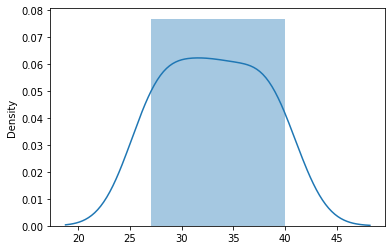

In [27]:
#Cek Normalitas A Dengan histogram
sns.distplot(A)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


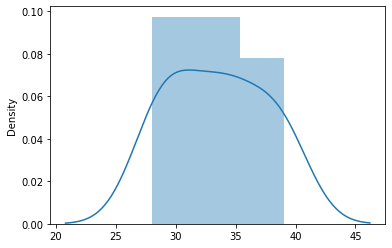

In [28]:
#Cek Normalitas B Dengan histogram
sns.distplot(B)

In [29]:
#Uji Kolmogorov-Smirnov
z_score_A = stats.zscore(A)
z_score_B = stats.zscore(B)
pval_A = stats.kstest(z_score_A, "norm").pvalue
pval_B = stats.kstest(z_score_B, "norm").pvalue
print('Uji Kolmogorov-Smirnov Data A =', stats.kstest(z_score_A, "norm"))
print('Uji Kolmogorov-Smirnov Data B =', stats.kstest(z_score_B, "norm"))

if pval_A and pval_B > 0.05:
  print('Kedua data berdistribusi normal')
elif pval_A and pval_B < 0.05:
  print('Kedua data tidak berdistribusi normal')
else:
  print('salah satu data tidak berdistribusi normal')

Uji Kolmogorov-Smirnov Data A = KstestResult(statistic=0.15010032999139777, pvalue=0.9106696943287013)
Uji Kolmogorov-Smirnov Data B = KstestResult(statistic=0.16609147661220497, pvalue=0.8346609194732189)
Kedua data berdistribusi normal


Apakah keduanya berdistribusi normal? bagaimana kamu mengetahuinya?

## Independent Sample T-Test (Parametrik)
Ho = Tidak ada perbedaan yang signifikan (keduanya sama)

Ha = ada perbedaan yang signifikan (artinya lokasi kafe berpengaruh signifikan terhadap jumlah pengunjung)

In [33]:
t_value = stats.ttest_ind(A, B)
pval = t_value.pvalue
print('Hasil Uji-T: ', t_value)

if pval > 0.05:
  print('Lokasi kafe tidak berpengaruh signifikan terhadap jumlah pengunjung')
else:
  print('Lokasi kafe berpengaruh signifikan terhadap jumlah pengunjung')

Hasil Uji-T:  Ttest_indResult(statistic=-0.21626215417063352, pvalue=0.8304712072353047)
Lokasi kafe tidak berpengaruh signifikan terhadap jumlah pengunjung


Nilai p-value = 0.83 > 0.05, artinya Ho diterima, tidak terdapat perbedaan yang signifikan antara jumlah pengunjung kafe wilayah A dan B, berarti lokasi kafe tidak berpengaruh signifikan terhadap jumlah pengunjung

## Uji Mann-Whitney
Misalkan datanya tidak berdistribusi normal, uji beda 2 kelompok independent dapat dilakukan dengan uji Mann-whitney. Caranya

In [34]:
stats.mannwhitneyu(A, B)

MannwhitneyuResult(statistic=91.0, pvalue=0.38212917802691737)

## Latihan 2
karena p-value = 0.38 > 0.05, maka Ho diterima, tidak terdapat perbedaan yang signifikan antara jumlah pengunjung kafe wilayah A dan B, berarti lokasi kafe tidak berpengaruh signifikan terhadap jumlah pengunjung

# Uji Beda lebih dari 2 kelompok

Dalam statistik parametrik, nama metodenya adalah ANOVA. ANOVA memiliki 2 asumsi :    
1. Data Berdistribusi Normal
2. Varians data homongen

**Kasus**

Misalkan saat ini kamu adalah menteri pendidikan yang ingin mengetahui apakah kualitas pendidikan di negara ini sudah merata atau belum. Daerah dibagi menjadi kota besar di wilayah berat, kota kecil di barat, ibukota, kota besar di wilayah timur, dan kota kecil di timur. Analisa ini dilakukan berdasarkan nilai ujian akhir SMA

In [4]:
final_exam = pd.read_csv('/content/final_exam.csv')
final_exam

,big_west,small_west,capital_city,big_east,small_east
0,87,77,86,71,70
1,75,83,90,82,76
2,80,73,87,85,81
3,75,82,85,89,85
4,91,71,85,72,75
5,89,87,96,79,75
6,91,77,95,79,75
7,87,84,89,85,72
8,90,86,93,84,72
9,94,93,91,86,75


## Uji Normalitas
Ho = data berdistribusi normal

Ha = data tidak berdistribusi normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'Small East')

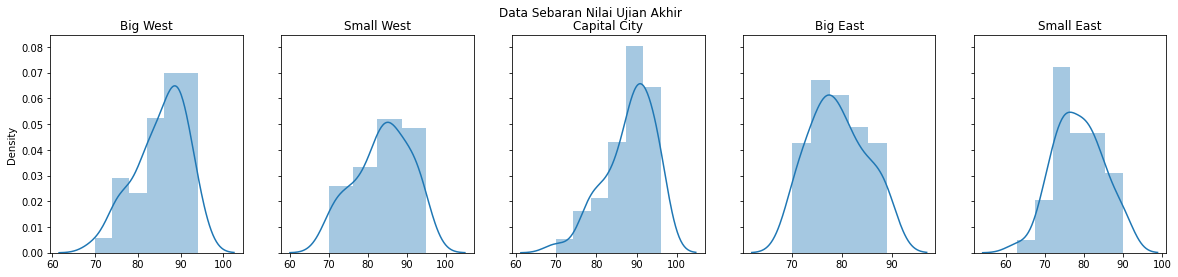

In [29]:
#Membuat histogram dari pandas dan matplotlib
big_west = list(final_exam['big_west'])
big_east = list(final_exam['big_east'])
capital_city = list(final_exam['capital_city'])
small_west = list(final_exam['small_west'])
small_east = list(final_exam['small_east'])

fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
fig.suptitle('Data Sebaran Nilai Ujian Akhir')

sns.distplot(ax=axes[0], x=big_west)
axes[0].set_title('Big West')
sns.distplot(ax=axes[1], x=small_west)
axes[1].set_title('Small West')
sns.distplot(ax=axes[2], x=capital_city)
axes[2].set_title('Capital City')
sns.distplot(ax=axes[3], x=big_east)
axes[3].set_title('Big East')
sns.distplot(ax=axes[4], x=small_east)
axes[4].set_title('Small East')

Terlihat beberapa datanya seperti tidak normal, mari kita coba uji Kolmogorov-Smirnov untuk mengeceknya

In [25]:
#Check normality using Kolmogorov-Smirnov Test
area = ['big_west', 'small_west', 'capital_city', 'small_east', 'big_east']
for a in area:
  z_score = stats.zscore(final_exam[a])
  normality = stats.kstest(z_score, 'norm')
  print('Normality for', a, '=', normality)
print()

for i in area:
  z_score = stats.zscore(final_exam[a])
  pval = stats.kstest(z_score, 'norm').pvalue
  if pval > 0.05 :
    print('Data Terdistribusi Normal')
  else:
    print('Data Tidak Terdistribusi Normal')

Normality for big_west = KstestResult(statistic=0.1463623852887705, pvalue=0.2875537193189711)
Normality for small_west = KstestResult(statistic=0.09305748870693209, pvalue=0.8504695155077621)
Normality for capital_city = KstestResult(statistic=0.1723544820281414, pvalue=0.13793715190373557)
Normality for small_east = KstestResult(statistic=0.11522951440351409, pvalue=0.5926673369890815)
Normality for big_east = KstestResult(statistic=0.09709346617838455, pvalue=0.8123161041508566)

Data Terdistribusi Normal
Data Terdistribusi Normal
Data Terdistribusi Normal
Data Terdistribusi Normal
Data Terdistribusi Normal


## Latihan 3
Karena nilai p-value > 0.05 pada semua kelompok data, maka semua data terdistribusi normal

## Uji Homogenitas

Ho = varians semua kelompok cenderung sama (homogen)

Ha = varians semua kelompok cenderung tidak sama (homogen)

In [26]:
#Uji Homogenitas dengan Levene
stats.levene(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'],
             final_exam['small_east'], final_exam['big_east'])

LeveneResult(statistic=0.5104303607286808, pvalue=0.728125042716542)

Karena p-value > 0.05, maka Ho diterima sehingga asumsi homogenitas dari ANOVA sudah terpenuhi

## Uji ANOVA (parametrik)

Ho = kualitas pendidikan merata (tidak ada perbedaan kualitas pendidikan yang signifikan antar wilayah)

Ha = kualitas pendidikan tidak merata (ada perbedaan kualitas pendidikan yang signifikan antar wilayah)

In [27]:
stats.f_oneway(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'],
               final_exam['small_east'], final_exam['big_east'])

F_onewayResult(statistic=18.48895253915249, pvalue=4.945434101915241e-13)

Karena p-value < 0.05, maka Ho ditolak, ternyata kualitas pendidikan di negara ini belum merata. Untuk itu, kamu perlu menyelidiki wilayah dengan rata-rata terendah agar kualitas sarana pendidikan dan gurunya bisa ditingkatkan

In [28]:
final_exam.describe()

,big_west,small_west,capital_city,big_east,small_east
count,43.000000,43.000000,43.000000,43.000000,43.000000
mean,85.325581,83.837209,88.232558,79.209302,78.627907
std,5.982995,7.006562,6.159921,5.667611,6.302015
min,70.000000,70.000000,70.000000,70.000000,63.000000
25%,82.000000,78.500000,85.000000,75.000000,75.000000
50%,87.000000,84.000000,90.000000,78.000000,80.000000
75%,90.000000,89.500000,93.000000,83.000000,83.000000
max,94.000000,95.000000,96.000000,89.000000,90.000000


Ternyata nilai rata-rata di ibukota jauh diatas wilayah lain, sementara kota kecil di timur mendapat nilai rata-rata terkecil. Sebagai menteri pendidikan berarti kamu harus membuat program untuk membangun sarana pendidikan yang lebih baik dan mengirim guru-guru terbaik ke kota kecil di wilayah timur.

## Uji Kruskal-Wallis (nonparametrik)
Jika datanya ternyata tidak berdistribusi normal atau tidak homogen, kamu bisa menggunakan uji Kruskal Wallis sebagai berikut

In [30]:
stats.kruskal(final_exam['big_west'], final_exam['small_west'], final_exam['capital_city'],
              final_exam['small_east'], final_exam['big_east'])

KruskalResult(statistic=57.244594069662135, pvalue=1.0992920086269013e-11)

## Latihan 4

Karena p-value = 1e-11 < 0.05, maka Ho ditolak, ternyata kualitas pendidikan di negara ini belum merata.

# Latihan tambahan

Misalkan kamu adalah data scientist di gojek. Kamu ingin mengetahui apakah kemacetan mempengaruhi tingkat kepuasan pelanggan. Jadi kamu ingin memebandingkan nilai "bintang" dari customer saat dia order di jam macet dan tidak macet.
(#hint = data dari customer yang sama)

macet = [2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5]

tidak_macet = [2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4]

1. Buat hipotesisnya
2. Lakukan uji asumsi normalitasnya
3. Jika datanya normal lakukan uji parametrik, jika tidak berdistribusi normal lakukan uji nonparametrik
4. Apa kesimpulan uji hipotesisnya?

##Uji Normalitas

Ho = data berdistribusi normal\
Ha = data tidak berdistribusi normal

In [3]:
macet = [2, 3, 5, 4, 5, 4, 4, 3, 4, 3, 4, 5, 4, 5, 4, 3, 4, 3, 3, 5, 4, 3, 4, 3, 4, 3, 4, 4, 5]
tak_macet = [2, 2, 4, 5, 4, 3, 3, 3, 3, 3, 3, 4, 4, 5, 4, 3, 3, 2, 3, 4, 4, 3, 3, 3, 4, 3, 4, 3, 4]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tidak Macet')

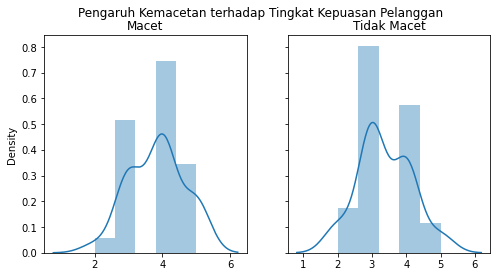

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
fig.suptitle('Pengaruh Kemacetan terhadap Tingkat Kepuasan Pelanggan')

sns.distplot(ax=axes[0], x=macet)
axes[0].set_title('Macet')
sns.distplot(ax=axes[1], x=tak_macet)
axes[1].set_title('Tidak Macet')

In [26]:
#Uji Kolmogorov-Smirnov
z_score_macet = stats.zscore(macet)
z_score_takmacet = stats.zscore(tak_macet)
pval_macet = stats.kstest(z_score_macet, "norm").pvalue
pval_takmacet = stats.kstest(z_score_takmacet, "norm").pvalue
print('Uji Kolmogorov-Smirnov Data Macet =', stats.kstest(z_score_macet, "norm"))
print('Uji Kolmogorov-Smirnov Data Tidak Macet =', stats.kstest(z_score_takmacet, "norm"))

for i in [pval_macet, pval_takmacet]:
  if i > 0.05 :
    print('Ho diterima, Data Terdistribusi Normal')
  else:
    print('Ho ditolak, Data Tidak Terdistribusi Normal')

Uji Kolmogorov-Smirnov Data Macet = KstestResult(statistic=0.2414618941043637, pvalue=0.05668593129743599)
Uji Kolmogorov-Smirnov Data Tidak Macet = KstestResult(statistic=0.2769460572882385, pvalue=0.01855050750663906)
Ho diterima, Data Terdistribusi Normal
Ho ditolak, Data Tidak Terdistribusi Normal


## Sample T-Test (Paired)

Ho = Tidak ada perbedaan yang signifikan (tidak berpengaruh)\
Ha = ada perbedaan yang signifikan (berpengaruh)

In [12]:
t_value = stats.ttest_rel(macet, tak_macet)
pval = t_value.pvalue
print('Hasil Uji-T: ', t_value)

if pval <= 0.05:
  print('Kemacetan mempengaruhi tingkat kepuasan pelanggan')
else:
  print('Kemacetan tidak mempengaruhi tingkat kepuasan pelanggan')

Hasil Uji-T:  Ttest_relResult(statistic=4.217756949399827, pvalue=0.00023376335151900594)
Kemacetan mempengaruhi tingkat kepuasan pelanggan


Karena p-value = 0.0002 < 0.05, maka Ho ditolak, terdapat perbedaan yang signifikan antara kepuasan pelanggan saat macet dan tidak macet, berarti kemacetan berpengaruh signifikan terhadap tingkat kepuasan pelanggan

## Uji Wilcoxon

In [28]:
arr_macet = np.array(macet)
arr_takmacet = np.array(tak_macet)
diff = arr_macet - arr_takmacet
pvalu = stats.wilcoxon(diff).pvalue
print('P-value :', pvalu)

if pvalu <= 0.05:
  print('Kemacetan mempengaruhi tingkat kepuasan pelanggan')
else:
  print('Kemacetan tidak mempengaruhi tingkat kepuasan pelanggan')

P-value : 0.0007891129890156299
Kemacetan mempengaruhi tingkat kepuasan pelanggan


Karena p-value = 0.00078 < 0.05, maka Ho ditolak, terdapat perbedaan yang signifikan antara kepuasan pelanggan saat macet dan tidak macet, berarti kemacetan berpengaruh signifikan terhadap tingkat kepuasan pelanggan